In [2]:
%cd ..

e:\Shelf-Monitoring-with-YOLO


In [19]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np
from utils.data_classes import Shelf

In [4]:
model=YOLO("models/shelves_model.pt")

In [5]:
results = model.predict(source="test.jpeg",conf=0.58)




image 1/1 e:\Shelf-Monitoring-with-YOLO\test.jpeg: 544x416 None331.3ms
Speed: 3.4ms preprocess, 331.3ms inference, 8.1ms postprocess per image at shape (1, 3, 544, 416)


In [8]:
to_rgb= lambda image: cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


(np.float64(-0.5), np.float64(193.5), np.float64(258.5), np.float64(-0.5))

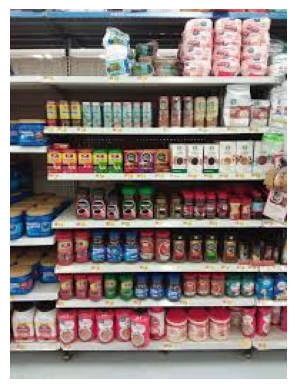

In [20]:
def detect_shelves(img):
    result=model(image,conf=0.58)
    shelves=result[0].obb.xyxyxyxy
    shelves_objs = [Shelf(shelf) for shelf in shelves]
    return shelves_objs


image=cv2.imread("test.jpeg")
plt.imshow(to_rgb(image))
plt.axis("off")

In [21]:
shelves=detect_shelves(image)


0: 544x416 None134.4ms
Speed: 2.4ms preprocess, 134.4ms inference, 80.8ms postprocess per image at shape (1, 3, 544, 416)


(np.float64(-0.5), np.float64(193.5), np.float64(258.5), np.float64(-0.5))

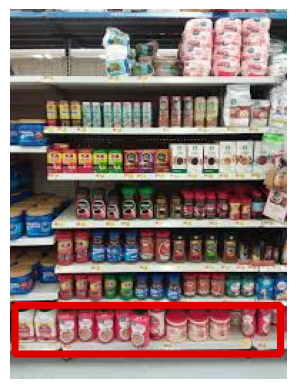

In [22]:
def draw_box(img,shelf):
    shelf_points=np.array([shelf.p1,shelf.p2,shelf.p3,shelf.p4])
    cv2.polylines(img,[shelf_points],True,color=(0,0,222),thickness=3)
    return img

drawen_img=draw_box(image.copy(),shelves[3])
plt.imshow(to_rgb(drawen_img))
plt.axis("off")
    

(np.float64(-0.5), np.float64(193.5), np.float64(258.5), np.float64(-0.5))

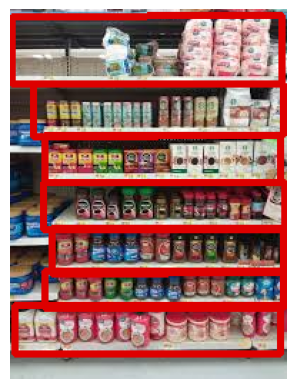

In [23]:
def draw_boxes(img,shelf):
    img_copy=image.copy()

    for shelf in shelves:
        draw_box(img_copy,shelf)

    return img_copy


drawen_img=draw_boxes(image,shelves)
drawen_img=to_rgb(drawen_img)
plt.imshow(drawen_img)
plt.axis("off")
    